# Visualización de Datos
---
## Intrucciones

Deberás entregar el segundo avance de tu proyecto final. Elegirás uno de los datasets del desafío “Elección de Potenciales Datasets e importe con la librería Pandas”. 

Posteriormente, crearás un notebook donde cargaran el archivo utilizando funciones de pandas para luego proceder a realizar 3 gráficos diferentes con Matplotlib y 3 con Seaborn. 

Finalmente, cada gráfico será interpretado con el fin de obtener insights relevantes que permitan dar respuesta a la pregunta problema.

In [1]:
# Llibrerías a utilizar
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos los estilos de gráficos a utilizar
mpl.style.use('ggplot')

## Dataset: Video Game Sales with Ratings

---
### Razón de elección del Dataset
Se decidió utilizar este dataset ya que contiene variables que a simple vista sugieren una alta correlación. Además, posee más de 16.000 filas, lo cual puede resultar ventajoso a la hora de trabajar en sets de training y test a futuro.


In [2]:
# Importamos el dataset
vgamesales_url = 'https://raw.githubusercontent.com/jbeltrang/datasets-ch/main/Video_Games_Sales_as_at_22_Dec_2016.csv'
vgamesales = pd.read_csv(vgamesales_url)
vgamesales

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


## Gráficos con Matplotlib

---

### Gráfico 1

Text(0.5, 1.0, 'Ventas Globales por Año de Videojuegos')

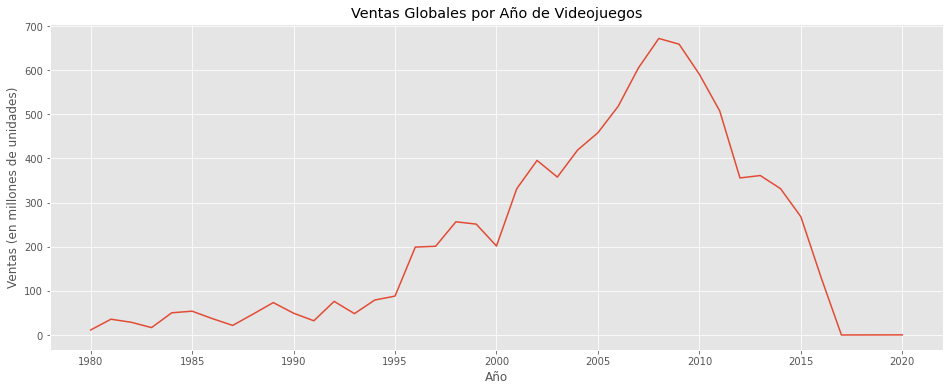

In [ ]:
# Hacemos un subset
vgamesales_dfg1 = vgamesales

# Definimos el año de lanzamiento como índice
vgamesales_dfg1.index = vgamesales_dfg1['Year_of_Release']
vgamesales_dfg1 = vgamesales_dfg1.drop('Year_of_Release', axis='columns')

# Agrupamos y sumamos las ventas globales por año
vgamesales_dfg1 = vgamesales_dfg1.groupby('Year_of_Release')['Global_Sales'].sum()
vgamesales_dfg1 = pd.DataFrame(vgamesales_dfg1)

# Definimos los ejes
x = vgamesales_dfg1.index
y = vgamesales_dfg1['Global_Sales']

# Definimos fig y ax
fig, ax = plt.subplots(figsize=(16, 6))

# Graficamos
ax.plot(x, y, label='Ventas Globales por Año de Videojuegos')
ax.set_xlabel('Año')  				
ax.set_ylabel('Ventas (en millones de unidades)')
ax.set_title('Ventas Globales por Año de Videojuegos')

#### Insights Relevantes:

En el gráfico se puede observar que la venta de videojuegos presenta un crecimiento sostenido en el tiempo. Además, se puede observar que existen datos que corresponden a años posteriores a lo que señalaba la muestra (hasta 2016), lo cual sugiere que es necesario realizar una limpieza del dataset antes de comenzar a trabajarlo.

### Gráfico 2

Text(0.5, 0, 'Género')

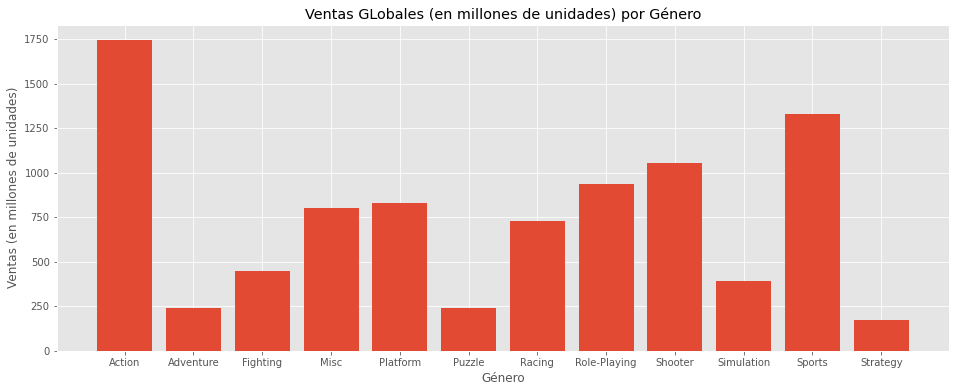

In [ ]:
# Hacemos un subset
vgamesales_dfg2 = vgamesales

# Definimos el género como índice
vgamesales_dfg2.index = vgamesales_dfg2['Genre']
vgamesales_dfg2 = vgamesales_dfg2.drop('Genre', axis='columns')

# Agrupamos y sumamos las ventas globales por Género
vgamesales_dfg2 = vgamesales_dfg2.groupby('Genre')['Global_Sales'].sum()
vgamesales_dfg2 = pd.DataFrame(vgamesales_dfg2)

# Graficamos
fig, ax = plt.subplots(figsize=(16,6))
ax.bar(vgamesales_dfg2.index, vgamesales_dfg2['Global_Sales'])
ax.set_title('Ventas Globales (en millones de unidades) por Género')
ax.set_ylabel('Ventas (en millones de unidades)')
ax.set_xlabel('Género')

#### Insights Relevantes:

Se puede apreciar que existen géneros de videojuegos que resultan más exitosos que otros. Esto sugiere que existe una alta probabilidad de que un juego de género acción vaya a tener más ventas que un videojuego de estrategia. Ahora, este análisis deja de lado la posibilidad de que a través del tiempo los consumidores hayan cambiado sus gustos y preferencias, por lo que se requiere un análisis más exhaustivo respecto a esto.

### Gráfico 3

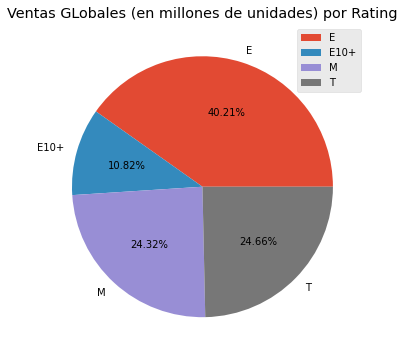

In [ ]:
# Hacemos un subset
vgamesales_dfg3 = vgamesales

# Definimos el género como índice
vgamesales_dfg3.index = vgamesales_dfg3['Rating']
vgamesales_dfg3 = vgamesales_dfg3.drop('Rating', axis='columns')

# Agrupamos y sumamos las ventas globales por Género
vgamesales_dfg3 = vgamesales_dfg3.groupby('Rating')['Global_Sales'].sum()
vgamesales_dfg3 = pd.DataFrame(vgamesales_dfg3)

# Dejamos el Top 4 dado que el porcentaje restante es poco considerable 
# Establecemos como parámetro comparativo que las ventas sean mayores a 5 millones de unidades
vgamesales_dfg3top = vgamesales_dfg3.loc[vgamesales_dfg3['Global_Sales'] > 5]

# Graficamos
fig, ax = plt.subplots(figsize =(16,6))
ax.pie(vgamesales_dfg3top['Global_Sales'], labels = vgamesales_dfg3top.index,autopct='%1.2f%%')
ax.set_title('Ventas GLobales (en millones de unidades) por Rating')
ax.legend()

#### Insights Relevantes:

El gráfico muestra que existe una distribución bastante marcada en términos de Rating. Se puede apreciar que la mayor parte del mercado se encuentra entre E, T y M. Esto sugiere que los desarrolladores de videojuegos exitosos se enfocan en estas clasificaciones a la hora de desarrollar sus videojuegos. Lo cual, puede asegurar cierto nivel de éxito en ventas.

## Gráficos con Seaborn

---

### Gráfico 1

Text(0.5, 1.0, 'Relación entre Puntuación de la Crítica y los Usuarios')

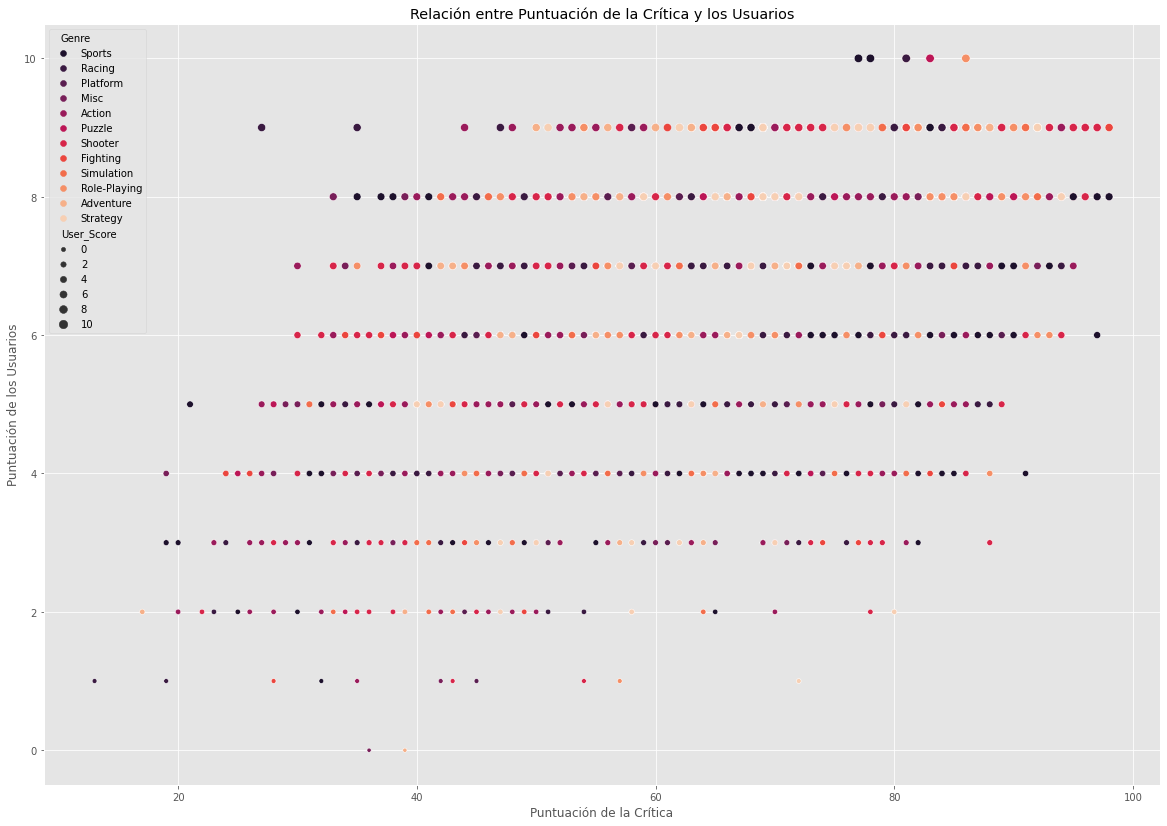

In [ ]:
# Definimos un subset sin NaN en User_Score y Critic_Score
vgamesales_dfg4 = vgamesales.loc[vgamesales['User_Score'] != 'tbd']
vgamesales_dfg4 = vgamesales_dfg4.dropna(subset=['User_Score', 'Critic_Score'])
vgamesales_dfg4 = vgamesales_dfg4.astype({'User_Score':'float'})

# Redondeamos User_Score para obtener un panorama más general
vgamesales_dfg4 = vgamesales_dfg4.round({"User_Score":0})

# Graficamos
f, axs = plt.subplots(figsize=(20, 14))
sns.scatterplot(data=vgamesales_dfg4, x="Critic_Score", y="User_Score", hue="Genre", palette='rocket', size="User_Score")
plt.xlabel("Puntuación de la Crítica")
plt.ylabel("Puntuación de los Usuarios")
plt.title("Relación entre Puntuación de la Crítica y los Usuarios")

#### Insights Relevantes:

Se puede apreciar que la crítica de los usuarios no tiene una tendencia clara hacia algún tipo de género en específico, al igual que la crítica realizada por especialistas. Esto sugiere que probablemente no exista una correlación entre estas 3 variables. Sin embargo si se observa que los títulos con mejores puntuaciones de ambos actores suele tener una mayor cantidad de críticas por aprte de los usuarios, tal y como se aprecia con el tamaño de los puntos en el gráfico, los cuales son más grandes al acercarse al acercarse a la parte superior derecha.

### Gráfico 2

<Figure size 432x288 with 0 Axes>

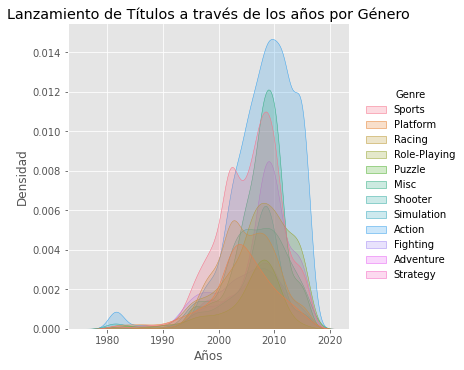

In [3]:
# Hacemos un subset
vgamesales_dfg5 = vgamesales

# Limpiamos la data que sea mayor al 2016
vgamesales_dfg5 = vgamesales_dfg5.loc[vgamesales_dfg5['Year_of_Release'] <= 2016]
vgamesales_dfg5 = vgamesales_dfg5.dropna(subset=['Year_of_Release'])

# Graficamos
plt.figure()
ax = sns.displot(data=vgamesales_dfg5, x='Year_of_Release', kind='kde', hue='Genre', fill=True)
ax.set(xlabel='Años', ylabel='Densidad', title='Lanzamiento de Títulos a través de los años por Género')

#### Insights Relevantes:

El gráfico muestra que a través de los años hubo un auge importante en el lanzamiento de videojuegos en algunos géneros en específico. Se destaca de manera especial el caso del género de acción, donde se aprecia una preponderancia importante en los últimos años. Esto puede resultar muy relevante considerando que una mayor competencia puede afectar las ventas de un videojuego en particular.

### Gráfico 3

Text(0.5, 1.0, 'Relación entre Lanzamiento de títulos y Plataformas')

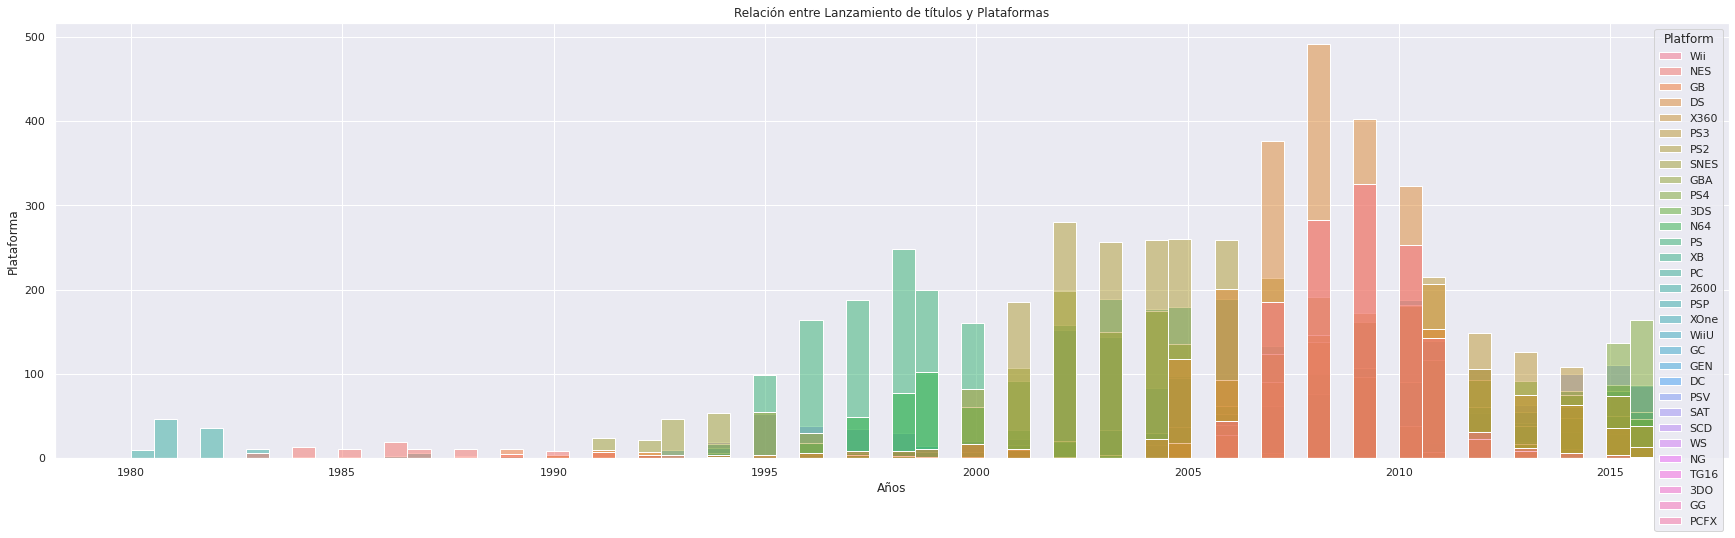

In [ ]:
# Hacemos un subset
vgamesales_dfg6 = vgamesales

# Limpiamos la data que sea mayor al 2016
vgamesales_dfg6 = vgamesales_dfg6.loc[vgamesales_dfg6['Year_of_Release'] <= 2016]
vgamesales_dfg6 = vgamesales_dfg6.dropna(subset=['Year_of_Release'])

# Axis-level
sns.set(rc={'figure.figsize':(30,8)})
sns.histplot(data=vgamesales_dfg6, x="Year_of_Release", hue="Platform")
plt.xlabel("Años")
plt.ylabel("Plataforma")
plt.title("Relación entre Lanzamiento de títulos y Plataformas")

#### Insights Relevantes:

Podemos observar que a medida que avanza el tiempo los lanzamientos de videojuegos con sus respectivas plataformas tienen en promedio una duración de 5 años alcanzando su auge en el tercer año. Esto es relevante si consideramos que las ventas de un videojuego van a estar asociadas a la vigencia de la plataforma en particular.